In [13]:
import argparse
import os
import datetime
import chainer
import pickle
import matplotlib.pyplot as plt
from chainer import training
from chainer.training import extensions
from PIL import Image, ImageDraw
import numpy as np
import cv2
import glob

import make_random_selfdata
from chainer import serializers
%matplotlib inline

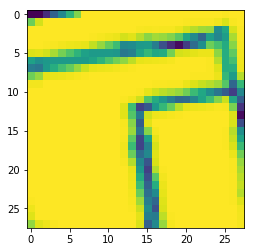

In [14]:
img = '../images/field_zyouge_sayuu_hanten.png'
dataset = make_random_selfdata.MakeRandomSelfdata(img)

num = 100000

train, train_debug_data = dataset.get_random_dataset_with_2d_GentleOnehotPosMap_and_2d_GentleOnethot_degVec(num,0)
#test, test_debug_data = dataset.get_random_dataset_for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnehotSinCos(num,1)

img ,label = train[0]
img  = np.reshape(label, (28,28))
plt.imshow(img)
plt.show()

In [15]:
func_name = 'for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnethot_degVec'
deg_range = dataset.rotation_angle
name  = func_name + '_' + str(deg_range)

In [16]:
def save_dataset(data, num, f): # 0:訓練データ　1:テストデータ
    dir_name = name
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
    else:
        now = datetime.datetime.now()
        dir_name = dir_name + '{0:%Y%m%d%H%M}'.format(now)
        os.mkdir(dir_name)
    if(f==0):
        dir_name = dir_name+'/'+'train'
        os.mkdir(dir_name)
    if(f==1):
        dir_name = dir_name+'/'+'test'
        os.mkdir(dir_name)
    for n in range(num):
        image_name = '{0:09d}'.format(n)
        img = train[n][0]
        img_uint = img *255
        img_uint = img_uint.astype(np.uint8)
        save_dir = './'+dir_name + '/'+ image_name  +'.jpg'
        cv2.imwrite(save_dir, img_uint)
            
        label = train[n][1]
        label_uint = label *255
        label_uint = label_uint.astype(np.uint8)
        save_dir = './'+dir_name + '/'+ image_name + '_label' +'.jpg'
        cv2.imwrite(save_dir, label_uint)
    print(dir_name)


In [17]:
save_dataset(train, num, 0)

for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnethot_degVec_20/train


In [ ]:
def add_data(data, num,  dir_name):
    ret = dir_name + str('?????????.jpg')
    print(ret)
    l = glob.glob(ret)
    already_exists = len(l)
    #print(already_exists)
    for n in range(num):
        image_name = '{0:09d}'.format(n+already_exists)
        #print(image_name)
        img = train[n][0]
        img_uint = img *255
        img_uint = img_uint.astype(np.uint8)
        save_dir = './'+dir_name + '/'+ image_name  +'.jpg'
        cv2.imwrite(save_dir, img_uint)
            
        label = train[n][1]
        label_uint = label *255
        label_uint = label_uint.astype(np.uint8)
        save_dir = './'+dir_name + '/'+ image_name + '_label' +'.jpg'
        cv2.imwrite(save_dir, label_uint)


In [ ]:
img = '../images/field_zyouge_sayuu_hanten.png'
dataset = make_random_selfdata.MakeRandomSelfdata(img)
num = 100000

train, train_debug_data = dataset.get_random_dataset_for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnehotSinCos(num,0)
add_data(train, num,'for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnehotSinCos_40/train/' )

In [ ]:
def read_dataset(data_dir, num, image_dim, label_dim): # 0:訓練データ　1:テストデータ
    images = np.zeros((num, image_dim), dtype=np.float32)
    labels = np.zeros((num, label_dim), dtype=np.float32)
    for n in range(num):
        img = data_dir + '{0:09d}'.format(n) + '.jpg'
        images[n, :] = cv2.imread(img, cv2.IMREAD_GRAYSCALE).flatten()
        label = data_dir + '{0:09d}'.format(n) + '_label'+ '.jpg'
        labels[n, :] = cv2.imread(label, cv2.IMREAD_GRAYSCALE).flatten()
    return chainer.datasets.TupleDataset(images, labels)

In [ ]:
train = read_dataset('for_rcvae_with_2d_GentleOnehotPosMap_and_2d_GentleOnehotSinCos_20/train/', 3, 6477, 28*28)
img ,label = train[2]
img  = np.reshape(label, (28,28))
print(img)
plt.imshow(img)
plt.show()